<a href="https://colab.research.google.com/github/mounikasrinivasarao/Apna-ML-Internship/blob/main/Disaster_or_not_Apna_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Disaster prediction**

Steps
  

*   Importing libraries
*   Data loading and preparing
*   Data pre-processing
*   Feature extraction techniques selection
*   Model selection
*   Model fitting
*   Model testing

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

**Import data**

In [2]:
df_train=pd.read_csv("/content/train.csv")
df_train.head(60)

,id,keyword,place,tweet,disaster
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


**EDA**

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   place     5080 non-null   object
 3   tweet     7613 non-null   object
 4   disaster  7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
df_train.nunique()

id          7613
keyword      221
place       3341
tweet       7503
disaster       2
dtype: int64

In [5]:
df_train['disaster'].value_counts()

disaster
0    4342
1    3271
Name: count, dtype: int64

In [6]:
df_train.duplicated().sum()

0

In [7]:
df_train.isna().sum()

id             0
keyword       61
place       2533
tweet          0
disaster       0
dtype: int64

**Data preprocessing**

**There are missing values in our dataset (keyword, place)**


*  We remove place variable
*  We try to fill in keyword



In [8]:
df_train['keyword'].fillna('unknown', inplace=True)

**Lower casing**

In [9]:
df_train['keyword'] = df_train['keyword'].str.lower()
df_train['tweet'] = df_train['tweet'].str.lower()

**Remove URL**

In [10]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

df_train['keyword'] = df_train['keyword'].apply(lambda x: remove_url(x))
df_train['tweet'] = df_train['tweet'].apply(lambda x: remove_url(x))

**Remove punctuations**

In [11]:
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

exclude = string.punctuation
df_train['keyword']  = df_train['keyword'].apply(lambda x: remove_punc(x))
df_train['tweet'] = df_train['tweet'].apply(lambda x: remove_punc(x))

**Remove digits**

In [12]:
df_train['keyword']  = df_train['keyword'].apply(lambda text: re.sub(r'\d+', '', text))
df_train['tweet'] = df_train['tweet'].apply(lambda text: re.sub(r'\d+', '', text))

**Remove stopwords**

In [13]:
nltk.download('stopwords')

from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')

def remove_stopwords(text):
    new_text=[]
    for word in text.split():
        if word in english_stopwords:
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

df_train['keyword'] = df_train['keyword'].apply(lambda x: remove_stopwords(x))
df_train['tweet'] = df_train['tweet'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
df_train['tweet']

0        deeds   reason   earthquake may allah forgive...
1                   forest fire near la ronge sask canada
2        residents asked  shelter  place   notified  o...
3       people receive wildfires evacuation orders  ca...
4        got sent  photo  ruby alaska  smoke  wildfire...
                              ...                        
7608    two giant cranes holding  bridge collapse  nea...
7609    ariaahrary thetawniest    control wild fires  ...
7610                               utckm   volcano hawaii
7611    police investigating   ebike collided   car  l...
7612     latest  homes razed  northern california wild...
Name: tweet, Length: 7613, dtype: object

In [15]:
X_train = df_train[['keyword','tweet']]

In [16]:
y_train = df_train['disaster']

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train)

In [18]:
X_train_combined = X_train['keyword'] + ' ' + X_train['tweet']

In [19]:
X_train_combined, X_val_combined, y_train, y_val = train_test_split(X_train_combined, y_train, test_size=0.2, random_state=42)

In [20]:
X_train_combined.shape

(6090,)

**Feature extraction - Count vectorizer**

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_train_bow = cv.fit_transform(X_train_combined)
X_val_bow = cv.transform(X_val_combined)

**Model fitting**

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_bow, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val_bow)

# Evaluate the model
print(classification_report(y_val, y_val_pred))
print("Accuracy:", accuracy_score(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       874
           1       0.82      0.65      0.72       649

    accuracy                           0.79      1523
   macro avg       0.80      0.77      0.78      1523
weighted avg       0.79      0.79      0.78      1523

Accuracy: 0.7892317793827971


**Results - Random Forest (Count vectorizer)**

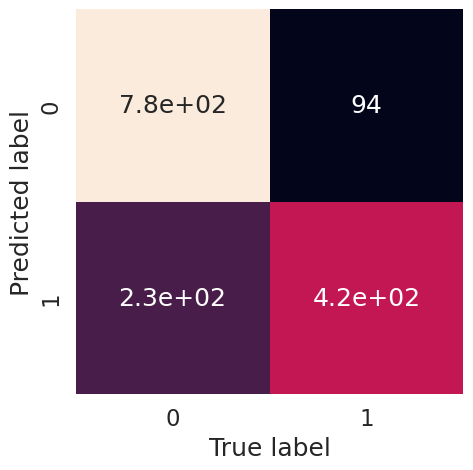

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True, cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")


plot_conf_mat(y_val,y_val_pred)

In [24]:
# Calculate precision, recall, and F1 score
precision_rf_cv = precision_score(y_val,y_val_pred)
recall_rf_cv = recall_score(y_val,y_val_pred)
f1_rf_cv = f1_score(y_val,y_val_pred)
accuracy_rf_cv = accuracy_score(y_val, y_val_pred)

# Print the scores
print(f"Precision: {precision_rf_cv:.2f}")
print(f"Recall: {recall_rf_cv:.2f}")
print(f"F1 Score: {f1_rf_cv:.2f}")

Precision: 0.82
Recall: 0.65
F1 Score: 0.72


**Feature Extraction - TFIDF**

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train_combined).toarray()
X_test_tfidf = tfidf.transform(X_val_combined)

In [26]:
X_train_tfidf.shape

(6090, 14682)

**Model fitting**

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_tfidf,y_train)
y_pred = rf.predict(X_test_tfidf)

**Results - Random Forest (TF-IDF)**

In [28]:
from sklearn.metrics import accuracy_score
accuracy_rf_tf = accuracy_score(y_val,y_pred)

In [29]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score
)

precision_rf_tf = precision_score(y_val, y_pred)
recall_rf_tf = recall_score(y_val, y_pred)
f1score_rf_tf = f1_score(y_val, y_pred)

print(f"Accuracy = {accuracy_rf_tf.round(4)}")
print(f"Precision = {precision_rf_tf.round(4)}")
print(f"Recall = {recall_rf_tf.round(4)}")
print(f"F1 Score = {f1score_rf_tf.round(4)}")

Accuracy = 0.78
Precision = 0.7754
Recall = 0.681
F1 Score = 0.7252


**Comparing Random Forest on CV and TF-IDF**

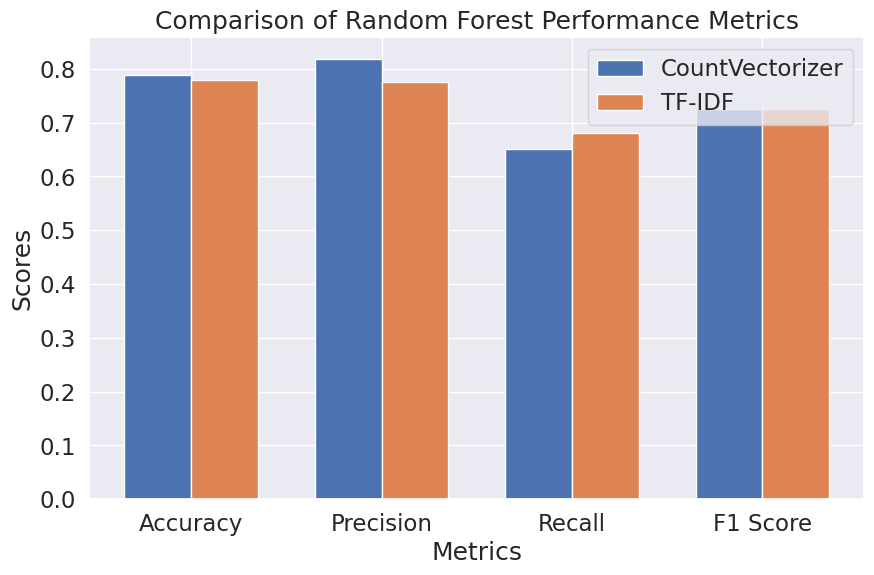

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics and values
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
cv_values = [accuracy_rf_cv, precision_rf_cv, recall_rf_cv, f1_rf_cv]
tfidf_values = [accuracy_rf_tf, precision_rf_tf, recall_rf_tf, f1score_rf_tf]

# Create bar width and positions
bar_width = 0.35
index = np.arange(len(metrics_names))

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(index, cv_values, bar_width, label='CountVectorizer')
bars2 = ax.bar(index + bar_width, tfidf_values, bar_width, label='TF-IDF')

# Adding labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Random Forest Performance Metrics')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics_names)
ax.legend()

# Display the plot
plt.show()

**LSTM**

In [31]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [32]:
### Vocabulary size
voc_size=10000

In [33]:
X_train_combined = X_train['keyword'] + ' ' + X_train['tweet']

In [34]:
y_train = df_train['disaster']

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train)

In [35]:
messages=X_train_combined.copy()

In [36]:
messages

0       unknown  deeds   reason   earthquake may allah...
1           unknown forest fire near la ronge sask canada
2       unknown  residents asked  shelter  place   not...
3       unknown people receive wildfires evacuation or...
4       unknown  got sent  photo  ruby alaska  smoke  ...
                              ...                        
7608    unknown two giant cranes holding  bridge colla...
7609    unknown ariaahrary thetawniest    control wild...
7610                      unknown  utckm   volcano hawaii
7611    unknown police investigating   ebike collided ...
7612    unknown  latest  homes razed  northern califor...
Length: 7613, dtype: object

In [37]:
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = messages[i]
    print(review)
    review = ''.join(review)
    print(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
screaming love waking    dad screaming  
screaming love waking    dad screaming  
5947
screaming    quiet enough   literally hear  phandom screaming   tyler tweet
screaming    quiet enough   literally hear  phandom screaming   tyler tweet
5948
screaming im screaming  fangirling oh  god
screaming im screaming  fangirling oh  god
5949
screaming  drag   last night   screaming shell   mannequin instead  shell   man   think everyone hated  
screaming  drag   last night   screaming shell   mannequin instead  shell   man   think everyone hated  
5950
screaming camilacabello internally  externally screaming
screaming camilacabello internally  externally screaming
5951
screaming cue  jariana stans screaming
screaming cue  jariana stans screaming
5952
screaming bizzlemahomie screaming
screaming bizzlemahomie screaming
5953
screaming camilacabello  im internally screaming
screaming camilacabello  im internally screaming
5954
screaming estellasrev

In [38]:
corpus

['unknown  deeds   reason   earthquake may allah forgive us ',
 'unknown forest fire near la ronge sask canada',
 'unknown  residents asked  shelter  place   notified  officers   evacuation  shelter  place orders  expected',
 'unknown people receive wildfires evacuation orders  california',
 'unknown  got sent  photo  ruby alaska  smoke  wildfires pours   school',
 'unknown rockyfire update california hwy closed   directions due  lake county fire cafire wildfires',
 'unknown flood disaster heavy rain causes flash flooding  streets  manitou colorado springs areas',
 'unknown im  top   hill    see  fire   woods',
 'unknown theres  emergency evacuation happening    building across  street',
 'unknown im afraid   tornado  coming   area',
 'unknown three people died   heat wave  far',
 'unknown haha south tampa  getting flooded hah wait  second  live  south tampa    gonna     gonna  fvck flooding',
 'unknown raining flooding florida tampabay tampa  days ive lost count',
 'unknown flood  bag

In [39]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr

[[9587, 1292, 7049, 6068, 9649, 3402, 635, 4126],
 [9587, 7319, 6426, 1609, 5424, 9081, 1029, 9730],
 [9587, 8801, 8602, 2375, 8261, 9941, 2888, 4446, 2375, 8261, 3520, 2555],
 [9587, 5409, 8368, 9137, 4446, 3520, 9450],
 [9587, 2876, 1320, 2516, 6530, 1587, 2460, 9137, 9337, 1085],
 [9587, 7665, 3723, 9450, 3664, 3122, 321, 521, 5216, 6301, 6426, 6929, 9137],
 [9587, 9840, 7740, 4931, 462, 7051, 236, 2274, 5155, 6439, 4482, 2486, 3323],
 [9587, 7881, 3577, 8202, 8370, 6426, 4056],
 [9587, 717, 1642, 4446, 2282, 3173, 2502, 4532],
 [9587, 7881, 8297, 9418, 2299, 6287],
 [9587, 8833, 5409, 8351, 1753, 4776, 9670],
 [9587,
  9351,
  930,
  5084,
  8638,
  4227,
  8917,
  5745,
  4790,
  9223,
  930,
  5084,
  4328,
  4328,
  7705,
  2274],
 [9587, 8084, 2274, 499, 1813, 5084, 6407, 1364, 2687, 8916],
 [9587, 9840, 8435, 2599, 4472, 8435],
 [9587, 3864, 1085, 7645, 405, 4652, 2324, 8435],
 [9587, 6614, 906],
 [9587, 9773, 2242],
 [9587, 4599, 9485],
 [9587, 4652, 6402],
 [9587, 2545],
 [9

In [40]:
import numpy as np

# Convert to numpy array for easier handling
one_hot_sentences = np.array(onehot_repr, dtype=object)

# Calculate the length of each sentence
sentence_lengths = np.array([len(sentence) for sentence in one_hot_sentences])

# Find the length of the longest sentence
max_length = np.max(sentence_lengths)

print("One-Hot Sentences:")
print(one_hot_sentences)
print("\nSentence Lengths:")
print(sentence_lengths)
print("\nLength of Longest Sentence:", max_length)

One-Hot Sentences:
[list([9587, 1292, 7049, 6068, 9649, 3402, 635, 4126])
 list([9587, 7319, 6426, 1609, 5424, 9081, 1029, 9730])
 list([9587, 8801, 8602, 2375, 8261, 9941, 2888, 4446, 2375, 8261, 3520, 2555])
 ... list([9587, 5549, 909, 4216])
 list([9587, 7477, 5500, 3092, 6971, 4652, 1418, 600, 3092, 4328, 4161, 3504, 3213, 3685, 7768])
 list([9587, 8061, 1393, 8751, 4607, 9450, 975, 3919, 4095])]

Sentence Lengths:
[ 8  8 12 ...  4 15  9]

Length of Longest Sentence: 24


**Embedding Representation**

In [41]:
sent_length=24
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3402  635 4126]
 [   0    0    0 ... 9081 1029 9730]
 [   0    0    0 ... 8261 3520 2555]
 ...
 [   0    0    0 ... 5549  909 4216]
 [   0    0    0 ... 3213 3685 7768]
 [   0    0    0 ...  975 3919 4095]]


In [42]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 9587, 1292, 7049, 6068, 9649, 3402,
        635, 4126], dtype=int32)

**Creating Model**

In [43]:
## Creating model

from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l1
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.regularizers import l2

embedding_vector_features = 40

model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model.add(Bidirectional(LSTM(16, kernel_regularizer=l2(0.01))))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 24, 40)            400000    
                                                                 
 bidirectional (Bidirection  (None, 32)                7296      
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 407329 (1.55 MB)
Trainable params: 407329 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [44]:
len(embedded_docs),y_train.shape

(7613, (7613,))

In [45]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y_train)

In [46]:
X_final.shape,y_final.shape

((7613, 24), (7613,))

**Splitting**

In [47]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and temporary data (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Split the temporary data into validation (10%) and test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

**Model Training**

In [48]:
### Finally Training
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10,batch_size=64, callbacks=[early_stopping])

Epoch 1/10
96/96 [==============================] - 11s 33ms/step - loss: 1.2265 - accuracy: 0.5878 - val_loss: 0.8688 - val_accuracy: 0.7240
Epoch 2/10
96/96 [==============================] - 2s 22ms/step - loss: 0.6504 - accuracy: 0.7961 - val_loss: 0.6071 - val_accuracy: 0.7556
Epoch 3/10
96/96 [==============================] - 3s 27ms/step - loss: 0.3973 - accuracy: 0.8688 - val_loss: 0.5324 - val_accuracy: 0.7806
Epoch 4/10
96/96 [==============================] - 3s 34ms/step - loss: 0.2763 - accuracy: 0.9151 - val_loss: 0.6189 - val_accuracy: 0.7464
Epoch 5/10
96/96 [==============================] - 3s 30ms/step - loss: 0.2031 - accuracy: 0.9401 - val_loss: 0.7337 - val_accuracy: 0.7398


In [49]:
from sklearn.metrics import confusion_matrix

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Get predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print(f"Accuracy = {accuracy}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

24/24 [==============================] - 0s 14ms/step - loss: 0.5009 - accuracy: 0.7992
Test Loss: 0.5008752346038818
Test Accuracy: 0.7992125749588013
24/24 [==============================] - 3s 11ms/step
Confusion Matrix:
[[401  40]
 [113 208]]
Accuracy = 0.7992125749588013
Precision = 0.8387096774193549
Recall = 0.6479750778816199
F1 Score = 0.7311072056239015


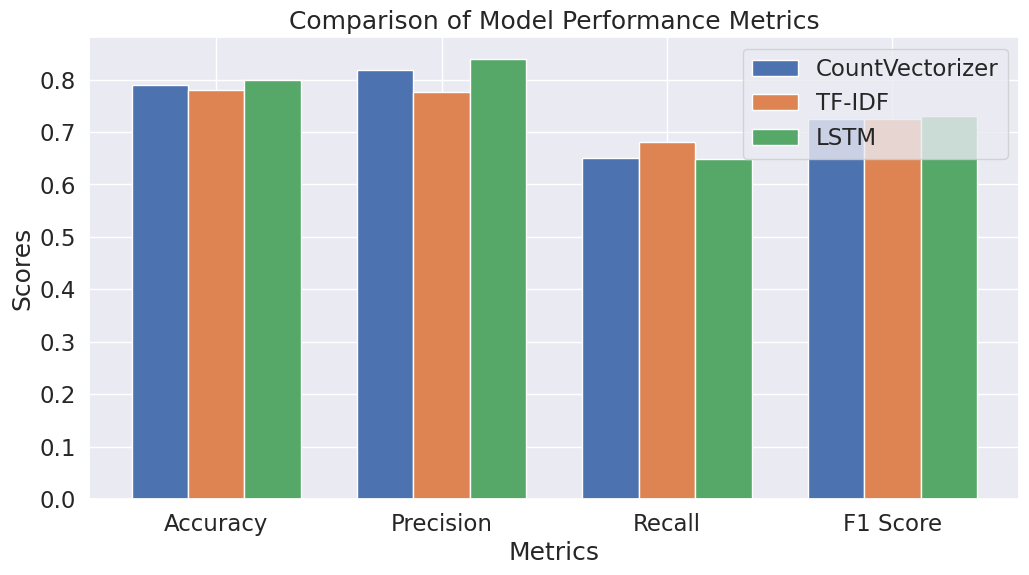

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics and values
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
cv_values = [accuracy_rf_cv, precision_rf_cv, recall_rf_cv, f1_rf_cv]
tfidf_values = [accuracy_rf_tf, precision_rf_tf, recall_rf_tf, f1score_rf_tf]
lstm_values = [accuracy, precision, recall, f1score]

# Create bar width and positions
bar_width = 0.25
index = np.arange(len(metrics_names))

# Plotting the bars
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(index, cv_values, bar_width, label='CountVectorizer')
bars2 = ax.bar(index + bar_width, tfidf_values, bar_width, label='TF-IDF')
bars3 = ax.bar(index + 2 * bar_width, lstm_values, bar_width, label='LSTM')

# Adding labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(metrics_names)
ax.legend()

# Display the plot
plt.show()